In [1]:
import glob
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
! for i in {01..25}; do stack build --executable-profiling  --ghc-options="-O2 -threaded -fprof-auto -rtsopts" advent${i} ; stack exec --profile -- advent${i} +RTS -pj ; done


In [3]:
len(glob.glob('*prof'))

25

In [6]:
profs = []
for fn in glob.glob('*prof'):
    with open(fn) as f:
        j = json.load(f)
        prof = {}
        for n in 'program total_time total_alloc total_ticks initial_capabilities'.split():
            prof[n] = j[n]
        profs.append(prof)
profs

[{'program': 'advent01',
  'total_time': 0.48,
  'total_alloc': 107029176,
  'total_ticks': 1644,
  'initial_capabilities': 12},
 {'program': 'advent16',
  'total_time': 0.15,
  'total_alloc': 17242880,
  'total_ticks': 528,
  'initial_capabilities': 12},
 {'program': 'advent23',
  'total_time': 72.61,
  'total_alloc': 10263690000,
  'total_ticks': 247608,
  'initial_capabilities': 12},
 {'program': 'advent15loop',
  'total_time': 42.69,
  'total_alloc': 8838275776,
  'total_ticks': 145584,
  'initial_capabilities': 12},
 {'program': 'advent24',
  'total_time': 26.45,
  'total_alloc': 4352105528,
  'total_ticks': 90180,
  'initial_capabilities': 12},
 {'program': 'advent21',
  'total_time': 0.15,
  'total_alloc': 9561880,
  'total_ticks': 528,
  'initial_capabilities': 12},
 {'program': 'advent19',
  'total_time': 0.24,
  'total_alloc': 44456496,
  'total_ticks': 816,
  'initial_capabilities': 12},
 {'program': 'advent08',
  'total_time': 0.4,
  'total_alloc': 74894192,
  'total_ticks'

In [80]:
performance = pd.DataFrame(profs).set_index('program').sort_index()
performance

,total_time,total_alloc,total_ticks,initial_capabilities
program,,,,
advent01,0.48,107029176,1644,12
advent02,0.26,35370072,876,12
advent03,0.06,4017640,192,12
advent04,0.44,60820368,1512,12
advent05,0.09,27810256,312,12
advent06,0.11,11624856,372,12
advent07,0.33,21605440,1128,12
advent08,0.40,74894192,1356,12
advent09,3.50,793279616,11928,12


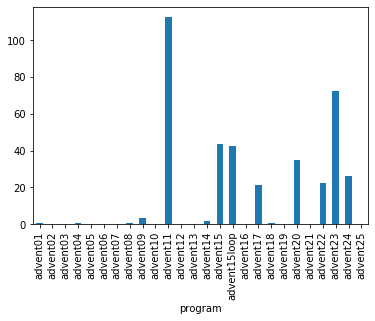

In [81]:
performance.total_time.plot.bar()

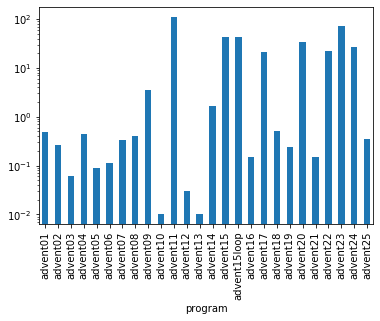

In [82]:
performance.total_time.plot.bar(logy=True)

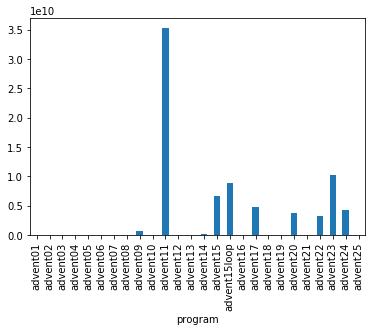

In [83]:
performance.total_alloc.plot.bar()

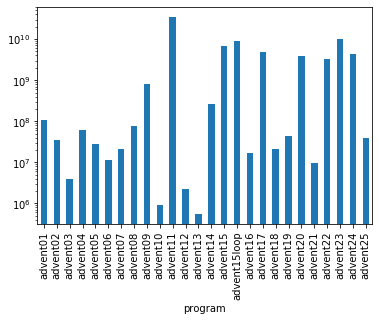

In [84]:
performance.total_alloc.plot.bar(logy=True)

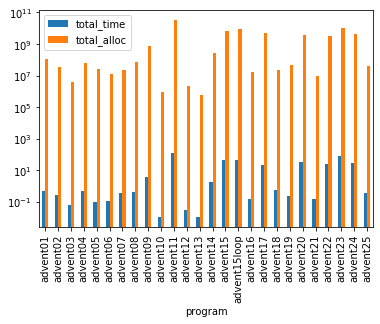

In [85]:
performance[['total_time', 'total_alloc']].plot.bar(logy=True)

In [86]:
times = pd.read_csv('time-results.csv').set_index('Program').sort_index()
times

,Elapsed time (s),Max memory
Program,,
advent01,0.39,72440
advent02,0.41,72440
advent03,0.37,72504
advent04,0.43,72504
advent05,0.43,72440
advent06,0.41,72504
advent07,0.39,72444
advent08,0.44,72508
advent09,0.66,72508


In [87]:
times.describe()

,Elapsed time (s),Max memory
count,26.000000,26.000000
mean,1.605769,86280.615385
std,3.255795,45597.232922
min,0.360000,72436.000000
25%,0.390000,72444.000000
50%,0.430000,72504.000000
75%,1.852500,72508.000000
max,16.750000,240444.000000


In [88]:
performance = performance.merge(times, left_index=True, right_index=True)
performance.drop(index='advent15loop', inplace=True)
performance

,total_time,total_alloc,total_ticks,initial_capabilities,Elapsed time (s),Max memory
program,,,,,,
advent01,0.48,107029176,1644,12,0.39,72440
advent02,0.26,35370072,876,12,0.41,72440
advent03,0.06,4017640,192,12,0.37,72504
advent04,0.44,60820368,1512,12,0.43,72504
advent05,0.09,27810256,312,12,0.43,72440
advent06,0.11,11624856,372,12,0.41,72504
advent07,0.33,21605440,1128,12,0.39,72444
advent08,0.40,74894192,1356,12,0.44,72508
advent09,3.50,793279616,11928,12,0.66,72508


In [89]:
performance.columns

Index(['total_time', 'total_alloc', 'total_ticks', 'initial_capabilities',
       'Elapsed time (s)', 'Max memory'],
      dtype='object')

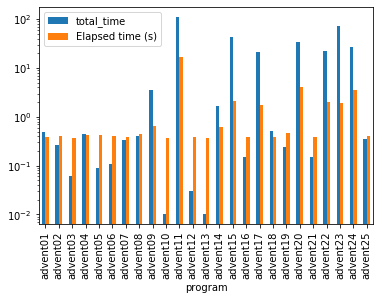

In [90]:
performance[['total_time', 'Elapsed time (s)']].plot.bar(logy=True)

In [91]:
performance['elapsed_adj'] = performance['Elapsed time (s)'] - 0.35
performance

,total_time,total_alloc,total_ticks,initial_capabilities,Elapsed time (s),Max memory,elapsed_adj
program,,,,,,,
advent01,0.48,107029176,1644,12,0.39,72440,0.04
advent02,0.26,35370072,876,12,0.41,72440,0.06
advent03,0.06,4017640,192,12,0.37,72504,0.02
advent04,0.44,60820368,1512,12,0.43,72504,0.08
advent05,0.09,27810256,312,12,0.43,72440,0.08
advent06,0.11,11624856,372,12,0.41,72504,0.06
advent07,0.33,21605440,1128,12,0.39,72444,0.04
advent08,0.40,74894192,1356,12,0.44,72508,0.09
advent09,3.50,793279616,11928,12,0.66,72508,0.31


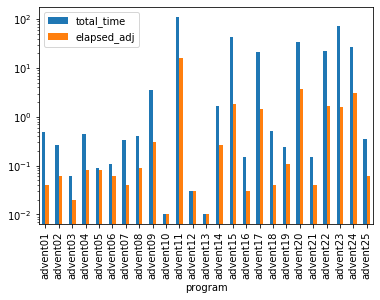

In [92]:
performance[['total_time', 'elapsed_adj']].plot.bar(logy=True)

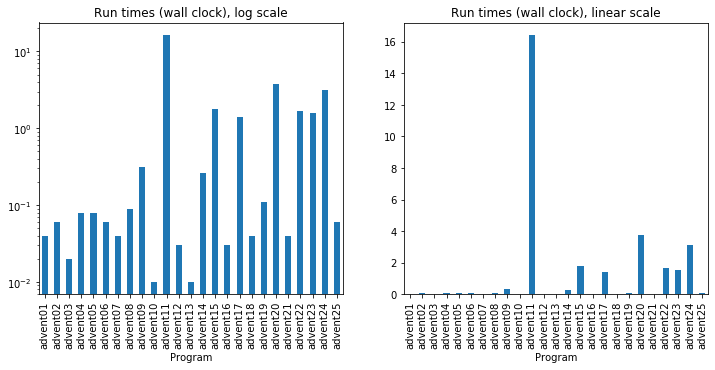

In [115]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))

performance['elapsed_adj'].plot.bar(ax=ax[0],
    logy=True, 
    title="Run times (wall clock), log scale",
#     figsize=(10,8)
    )
ax[0].set_xlabel('Program')

performance['elapsed_adj'].plot.bar(ax=ax[1],
    logy=False, 
    title="Run times (wall clock), linear scale",
#     figsize=(10,8)
    )
ax[1].set_xlabel('Program')

plt.savefig('run_times_combined.png')

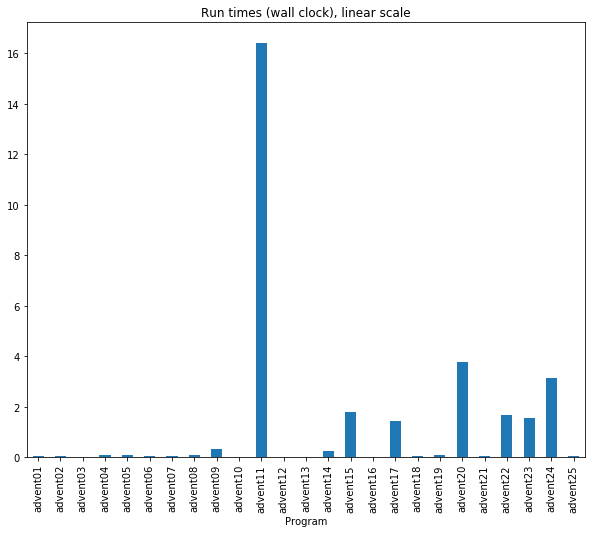

In [109]:
ax = performance['elapsed_adj'].plot.bar(logy=False, 
    title="Run times (wall clock), linear scale",
    figsize=(10,8))
ax.set_xlabel('Program')
plt.savefig('run_times_linear.png')

In [93]:
performance.columns

Index(['total_time', 'total_alloc', 'total_ticks', 'initial_capabilities',
       'Elapsed time (s)', 'Max memory', 'elapsed_adj'],
      dtype='object')

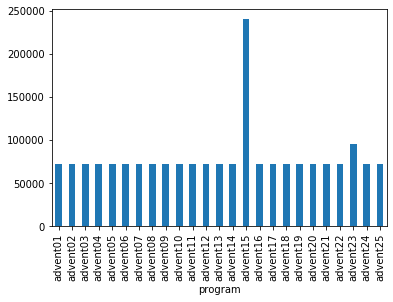

In [94]:
performance['Max memory'].plot.bar()

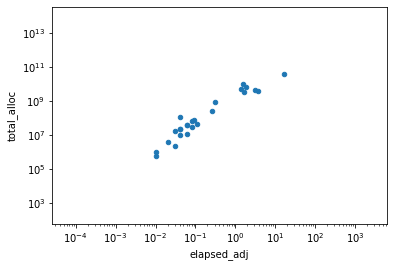

In [95]:
performance.plot.scatter('elapsed_adj', 'total_alloc', logx=True, logy=True)

In [100]:
performance[['total_alloc', 'Max memory', 'elapsed_adj']].to_csv('performance.csv')